In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_white_gaussian_noise(mean, std, num_samples):
    samples = np.random.normal(mean, std, size=num_samples)
    plt.plot(samples)
    plt.show()

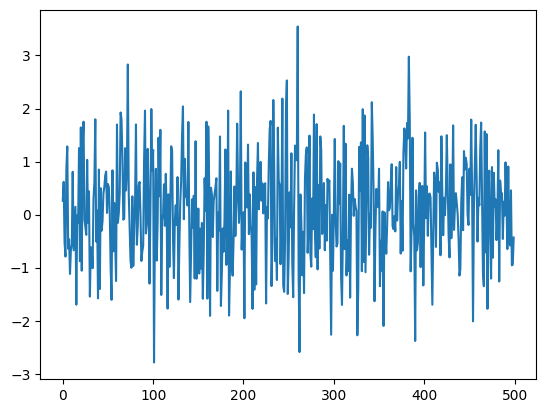

In [3]:
generate_white_gaussian_noise(0, 1, 500)

In [ ]:
mean = [0, 0, 1, -1]
cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
x0 = np.random.multivariate_normal(mean, cov, 1).T
plt.plot(x, y, '.')
plt.show()

In [ ]:
x0.shape

(4, 1)

In [ ]:
plt.plot(x)
plt.plot(y)
plt.show()

In [5]:
N = 100
dt = 0.1

In [6]:
def state_system(t):
    A = [[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]]
    mean = [0, 0, 1, -1]
    cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
    mean2 = [0, 0, 0, 0]
    cov2 = [[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]]
    L = [np.random.multivariate_normal(mean, cov, 1).T]
    for i in range(1, t):
        L.append(np.dot(A, L[i-1]) + np.random.multivariate_normal(mean2, cov2, 1).T)
    return L

In [ ]:
state_system(N)

In [8]:
def measurements(t):
    mean = [0, 0]
    cov = [[4, 0], [0, 4]]
    return state_system(t)[0:2], state_system(t)[0:2] + np.random.multivariate_normal(mean, cov, 1).T

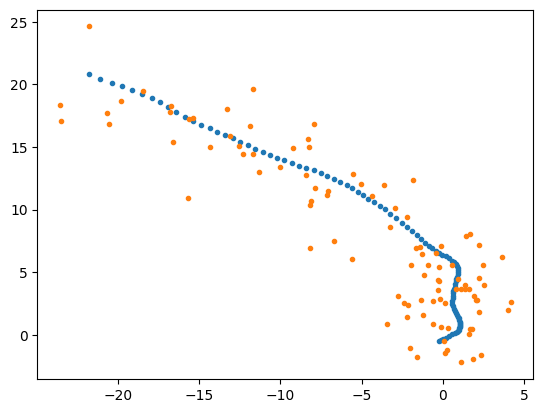

In [9]:
X1=[]
Y2=[]
X2=[]
Y1=[]
X3=[]
X4=[]
V1=[]
V2=[]
mean = [0, 0]
cov = [[4, 0], [0, 4]]
L = state_system(N)
for i in range(len(L)):
    x,y = L[i], L[i][0:2] + np.random.multivariate_normal(mean, cov, 1).T
    X1.append(x[0])
    X2.append(x[1])
    X3.append(x[2])
    X4.append(x[3])
    Y1.append(y[0])
    Y2.append(y[1])
    V1.append((Y1[i]-Y1[i-1])/dt)
    V2.append((Y2[i]-Y2[i-1])/dt)
plt.plot(X1,X2,'.') 
plt.plot(Y1,Y2, '.')
plt.show()

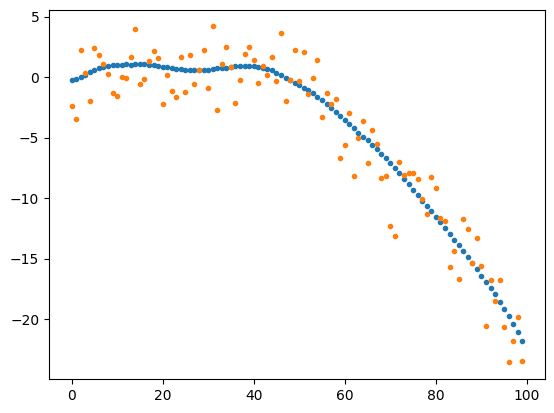

In [10]:
plt.plot(X1, '.') 
plt.plot(Y1, '.')
plt.show()

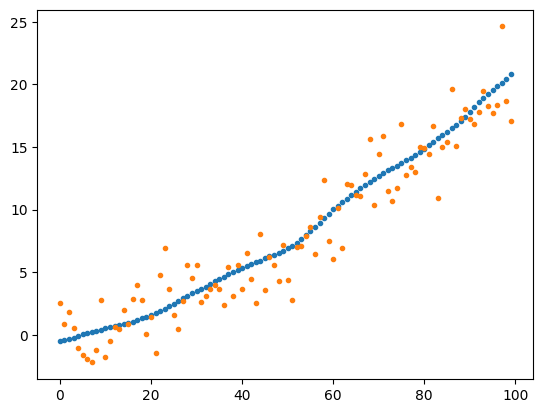

In [11]:
plt.plot(X2,'.') 
plt.plot(Y2,'.')
plt.show()

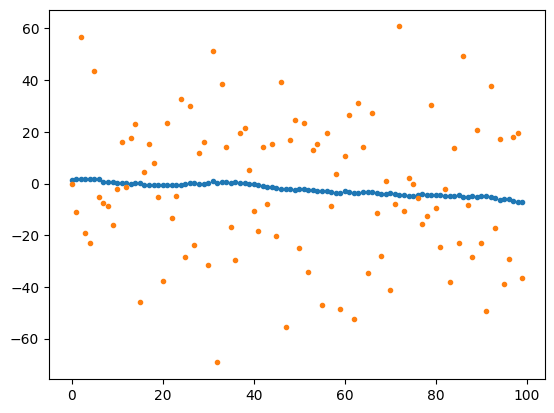

In [12]:
plt.plot(X3,'.') 
plt.plot(V1,'.')
plt.show()

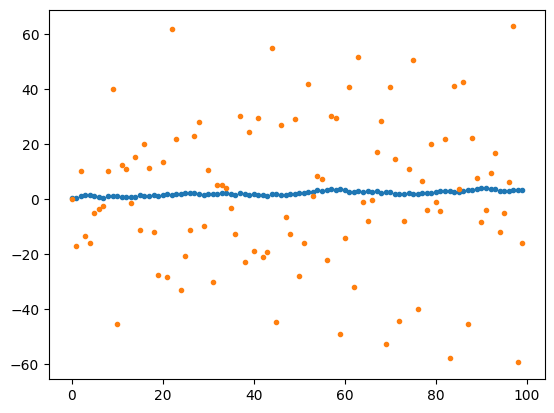

In [13]:
plt.plot(X4,'.') 
plt.plot(V2,'.')
plt.show()

### Kalman filter

In [66]:
def state_system2(t):
    W = state_system(t)
    A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
    mean = [0, 0, 1, -1]
    cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
    # x prediction before 
    X_b = [0]
    # x prediction after
    X_a = [np.random.multivariate_normal(mean, cov, 1).T]
    K = [A[0:2]]
    C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
    P_b = [A]
    P_a = [A]
    R = [[4, 0], [0, 4]]
    Q = [[(dt**3)/3, 0, (dt**2)/2, 0], [0, (dt**3)/3, 0, (dt**2)/2], [(dt**2)/2, 0, dt, 0], [0, (dt**2)/2, 0, dt]]
    for i in range(1, t):
        P_b.append(np.dot(np.dot(A, P_a[i-1]), A.T) + Q)
        K.append(np.dot(np.dot(P_b[i], C.T), np.linalg.inv(np.dot(np.dot(C, P_b[i]), C.T) + R)))
        # Prediction :
        X_b.append(np.dot(A, X_a[i-1]))
        P_a.append(np.dot((cov-np.dot(K[i], C)), P_b[i]))
        # Correction :
        X_a.append(X_b[i] + np.dot(K[i], W[i][0:2] + np.random.multivariate_normal(mean, cov, 1) - X_b[i][0:2]))
    return X_a, P_a

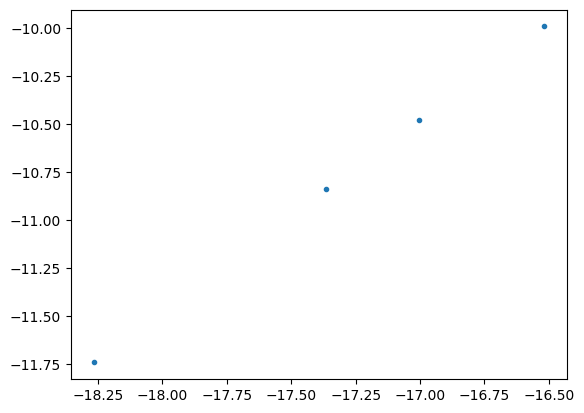

In [72]:
X1=[]
X2=[]
X3=[]
X4=[]
L, _ = state_system2(N)
for i in range(len(L)):
    x = L[i]
    X1.append(x[0])
    X2.append(x[1])
    X3.append(x[2])
    X4.append(x[3])
plt.plot(L[i][0],L[i][1],'.')
plt.show()